In [186]:
import warnings
import pandas as pd
import numpy as np
import riskfolio as rp
from openbb_terminal.sdk import openbb
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns

In [195]:
pd.reset_option("display.float_format")

In [196]:
#Use the OpenBB SDK to pull closing price data for the past 10 years
start = '2013-02-13'
end = '2023-02-13'

symbols = ["SPY", "COST", "AVGO", "APD", "AMGN", "CVX", "AAPL", "DIS",
          "BAC", "GS", "SBUX", "COF", "ETN", "XOM", "HD", "MA",
          "QQQ", "IWM", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NVDA", "NKE",
          "PEP", "PFE", "PG", "MO", "BUD", "SHW", "TSCO", "UNH", "VZ", "V", "WMT"]

data = openbb.economy.index(symbols, start_date=start, end_date=end)
data

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-13 00:00:00-05:00,126.366058,83.569145,26.767317,64.430954,65.351990,76.319008,14.405276,49.963749,10.341107,130.554352,...,17.901684,57.207523,19.707798,68.738297,50.024666,45.482632,49.074020,28.145350,36.090050,57.176144
2013-02-14 00:00:00-05:00,126.482391,83.889832,27.125034,64.365646,65.182747,76.437950,14.392319,49.891014,10.307116,131.745605,...,17.941467,57.371914,19.328148,72.242958,49.486485,45.769367,48.919697,28.025225,36.372208,56.719646
2013-02-15 00:00:00-05:00,126.332878,84.013214,26.744478,64.031815,64.328705,75.942467,14.193984,50.554657,10.222142,130.951447,...,18.093960,57.192570,19.481140,72.219589,50.402611,45.778194,49.151192,28.069477,36.840912,55.502289
2013-02-19 00:00:00-05:00,127.279686,83.791176,27.048914,64.372925,64.728821,76.576660,14.188742,50.663746,10.358096,134.043762,...,18.372431,57.820240,19.702135,72.499969,49.616493,45.632610,48.585262,28.132696,36.752304,55.069805
2013-02-20 00:00:00-05:00,125.693344,83.116898,26.386776,63.581833,65.128891,75.962311,13.845119,49.636475,10.026708,131.111984,...,18.279610,57.596077,19.770126,72.328644,48.174267,44.803253,47.341896,28.398220,36.241623,55.430195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,409.829987,515.590027,601.299988,283.029999,241.718353,168.153488,151.498688,109.870003,36.369999,370.799988,...,43.759998,141.399994,46.959999,58.730000,243.029999,232.419998,475.239990,41.279999,228.991501,140.679993
2023-02-07 00:00:00-05:00,415.190002,516.530029,614.450012,285.070007,241.867035,172.564484,154.414230,111.629997,36.770000,374.399994,...,43.590000,140.020004,46.560001,58.419998,238.440002,232.729996,476.880005,40.549999,230.867828,140.979996
2023-02-08 00:00:00-05:00,410.649994,503.809998,601.710022,287.239990,238.100250,168.510330,151.688400,111.779999,36.500000,375.100006,...,43.980000,138.570007,46.500000,58.200001,235.509995,231.240005,483.220001,40.520000,229.750000,140.220001


In [181]:
#Calc the daily returns using the .pct_change function
returns = data.pct_change().dropna()
returns

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-14 00:00:00-05:00,0.0920%,0.3838%,1.3363%,-0.1014%,-0.2590%,0.1558%,-0.0899%,-0.1455%,-0.3286%,0.9125%,...,0.2222%,0.2874%,-1.9264%,5.0986%,-1.0759%,0.6305%,-0.3145%,-0.4268%,0.7818%,-0.7984%
2013-02-15 00:00:00-05:00,-0.1182%,0.1470%,-1.4029%,-0.5186%,-1.3102%,-0.6481%,-1.3781%,1.3302%,-0.8244%,-0.6028%,...,0.8500%,-0.3126%,0.7915%,-0.0323%,1.8513%,0.0193%,0.4733%,0.1579%,1.2886%,-2.1463%
2013-02-19 00:00:00-05:00,0.7494%,-0.2643%,1.1383%,0.5327%,0.6219%,0.8351%,-0.0369%,0.2158%,1.3300%,2.3614%,...,1.5390%,1.0975%,1.1344%,0.3882%,-1.5597%,-0.3180%,-1.1514%,0.2252%,-0.2406%,-0.7793%
2013-02-20 00:00:00-05:00,-1.2463%,-0.8047%,-2.4479%,-1.2289%,0.6181%,-0.8023%,-2.4218%,-2.0276%,-3.1994%,-2.1872%,...,-0.5053%,-0.3877%,0.3451%,-0.2363%,-2.9068%,-1.8175%,-2.5591%,0.9438%,-1.3895%,0.6545%
2013-02-21 00:00:00-05:00,-0.6079%,-0.3858%,-2.8843%,-2.2144%,0.5670%,0.0000%,-0.6216%,-0.7875%,-3.2203%,-2.7710%,...,-0.5803%,-0.0519%,0.8885%,-0.8722%,-1.8385%,-0.4637%,0.0544%,0.4452%,1.2997%,1.5171%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,-0.6111%,0.1535%,0.6158%,-0.6982%,-0.5384%,0.1121%,-1.7929%,-0.7587%,-0.1647%,0.2298%,...,-0.6809%,-0.8485%,0.1066%,-0.7772%,0.5378%,1.6888%,0.6822%,-0.5541%,-0.2998%,-0.7268%
2023-02-07 00:00:00-05:00,1.3079%,0.1823%,2.1869%,0.7208%,0.0615%,2.6232%,1.9245%,1.6019%,1.0998%,0.9709%,...,-0.3885%,-0.9759%,-0.8518%,-0.5278%,-1.8887%,0.1334%,0.3451%,-1.7684%,0.8194%,0.2133%
2023-02-08 00:00:00-05:00,-1.0935%,-2.4626%,-2.0734%,0.7612%,-1.5574%,-2.3494%,-1.7653%,0.1344%,-0.7343%,0.1870%,...,0.8947%,-1.0356%,-0.1289%,-0.3766%,-1.2288%,-0.6402%,1.3295%,-0.0740%,-0.4842%,-0.5391%


In [182]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = returns.corr()
correlation.head()

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
SPY,100.0000%,60.8160%,66.8050%,69.3016%,57.0142%,62.8123%,71.9935%,67.3609%,72.0519%,75.0627%,...,52.3976%,56.5727%,47.9139%,54.7285%,62.6598%,52.2275%,62.9447%,47.5532%,76.7353%,45.3606%
COST,60.8160%,100.0000%,37.7855%,41.4306%,35.9313%,25.9593%,46.3022%,35.5641%,31.9032%,37.4683%,...,33.7557%,48.2418%,31.8428%,26.1683%,39.8854%,44.9113%,39.0949%,35.7311%,42.6754%,56.6400%
AVGO,66.8050%,37.7855%,100.0000%,43.9877%,36.4005%,39.6398%,56.5675%,41.6192%,44.4839%,47.8857%,...,29.0153%,29.1972%,25.9449%,37.3356%,44.3967%,35.8696%,38.8557%,23.3512%,50.9627%,23.3888%
APD,69.3016%,41.4306%,43.9877%,100.0000%,42.0316%,46.2720%,43.2988%,45.5892%,51.9289%,52.7112%,...,39.1120%,44.5555%,37.7382%,41.4861%,51.9332%,35.7681%,46.3859%,36.7115%,55.1613%,33.0849%
AMGN,57.0142%,35.9313%,36.4005%,42.0316%,100.0000%,30.7524%,37.0575%,33.0811%,38.8915%,39.1262%,...,49.1405%,42.0546%,30.1814%,29.2932%,38.5790%,31.7919%,46.3935%,34.4207%,43.2141%,32.8035%


<AxesSubplot: >

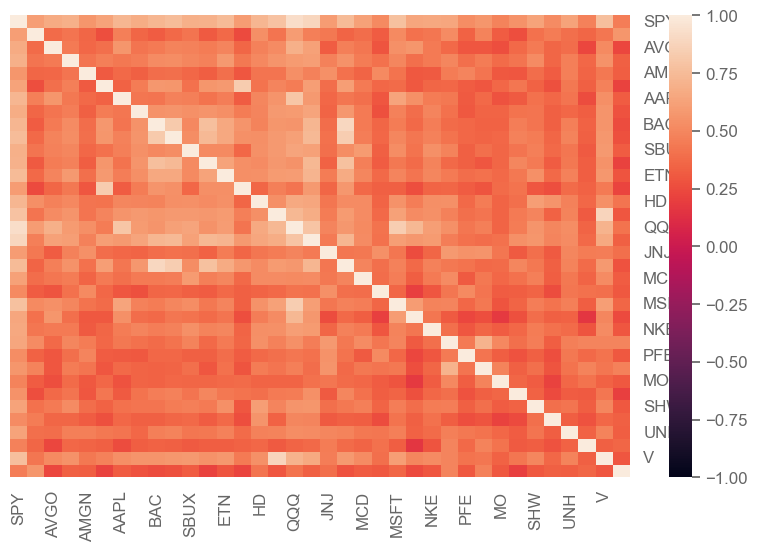

In [183]:
# Use heatmap to visualize the correlation of the stocks in the portfolio
sns.heatmap(correlation, vmin=-1, vmax=1)

In [184]:
#weight the portfolio (0.0285 = equal wt for 35 stocks)
#weight the portfolio
portfolio_weighted_returns = ((returns["COST"]*.0059) + (returns["AVGO"]*.0088) + (returns["APD"]*.0066) + (returns["AMGN"]*.0029) + (returns["CVX"]*.0191) + 
        (returns["AAPL"]*.0125) + (returns["DIS"]*.1366) + (returns["BAC"]*.1109) + (returns["GS"]*.0044) + (returns["SBUX"]*.0389) + 
        (returns["COF"]*.0132) + (returns["ETN"]*.0264) + (returns["XOM"]*.0345) + (returns["HD"]*.0066) + (returns["MA"]*.0125) + 
        (returns["QQQ"]*.0800) + (returns["IWM"]*.0352) + (returns["JNJ"]*.0184) + (returns["JPM"]*.0228) + (returns["MCD"]*.0330) + 
        (returns["MRK"]*.0081) + (returns["MSFT"]*.0213) + (returns["NVDA"]*.1043) + (returns["NKE"]*.0264) + (returns["PEP"]*.0110) + 
        (returns["PFE"]*.0404) + (returns["PG"]*.0125) + (returns["MO"]*.0162) + (returns["BUD"]*.0360) + (returns["SHW"]*.0073) + 
        (returns["TSCO"]*.0492) + (returns["UNH"]*.0066) + (returns["VZ"]*.0235) + (returns["V"]*.0081) + (returns["WMT"]*.0132)
        
            )
portfolio_weighted_returns.head()

Date
2013-02-14 00:00:00-05:00    0.4757%
2013-02-15 00:00:00-05:00   -0.0332%
2013-02-19 00:00:00-05:00    0.3672%
2013-02-20 00:00:00-05:00   -1.4489%
2013-02-21 00:00:00-05:00   -0.8416%
dtype: float64

<AxesSubplot: title={'left': 'Mike Portfolio Daily Returns'}, xlabel='Date'>

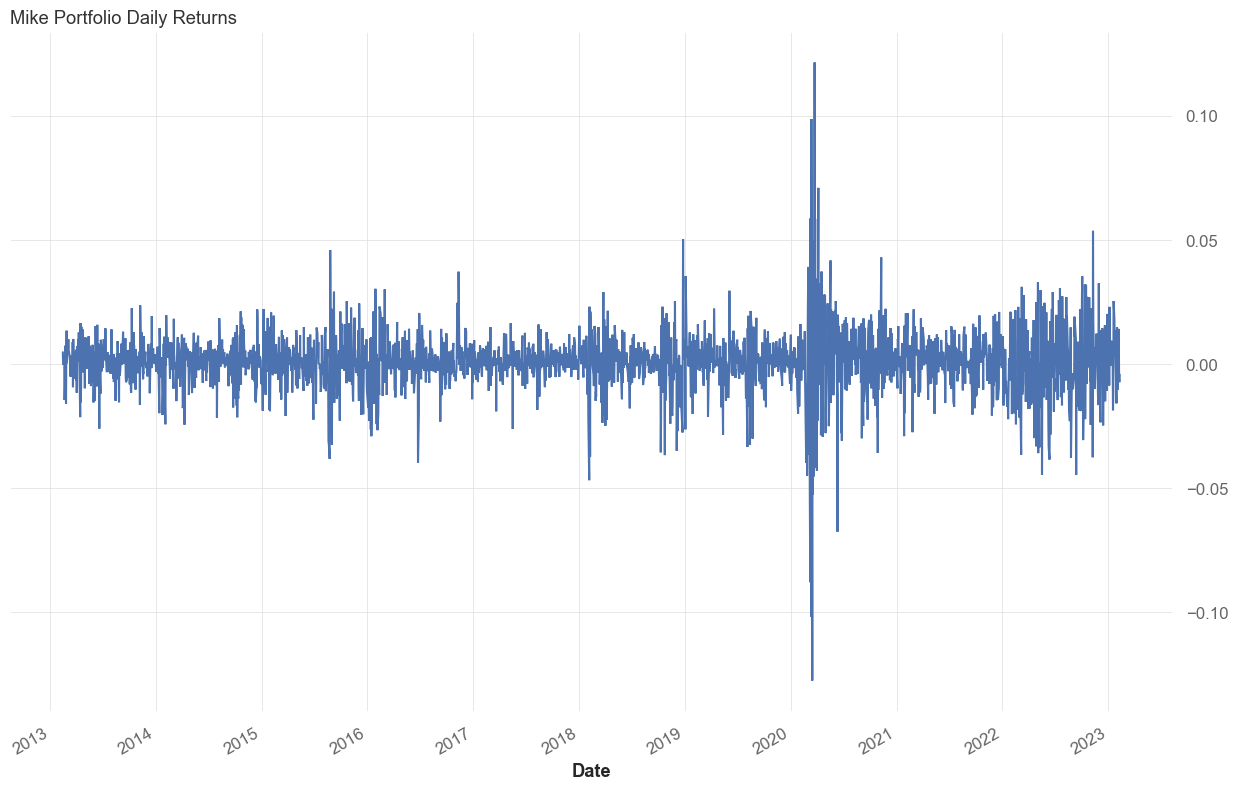

In [185]:
#Daily returns of the portfolio
portfolio_weighted_returns.plot(
    title = "Mike Portfolio Daily Returns",
    figsize = (15, 10)
)

<AxesSubplot: title={'left': 'Mike Portfolio Cumulative Returns'}, xlabel='Date', ylabel='Cumulative Returns'>

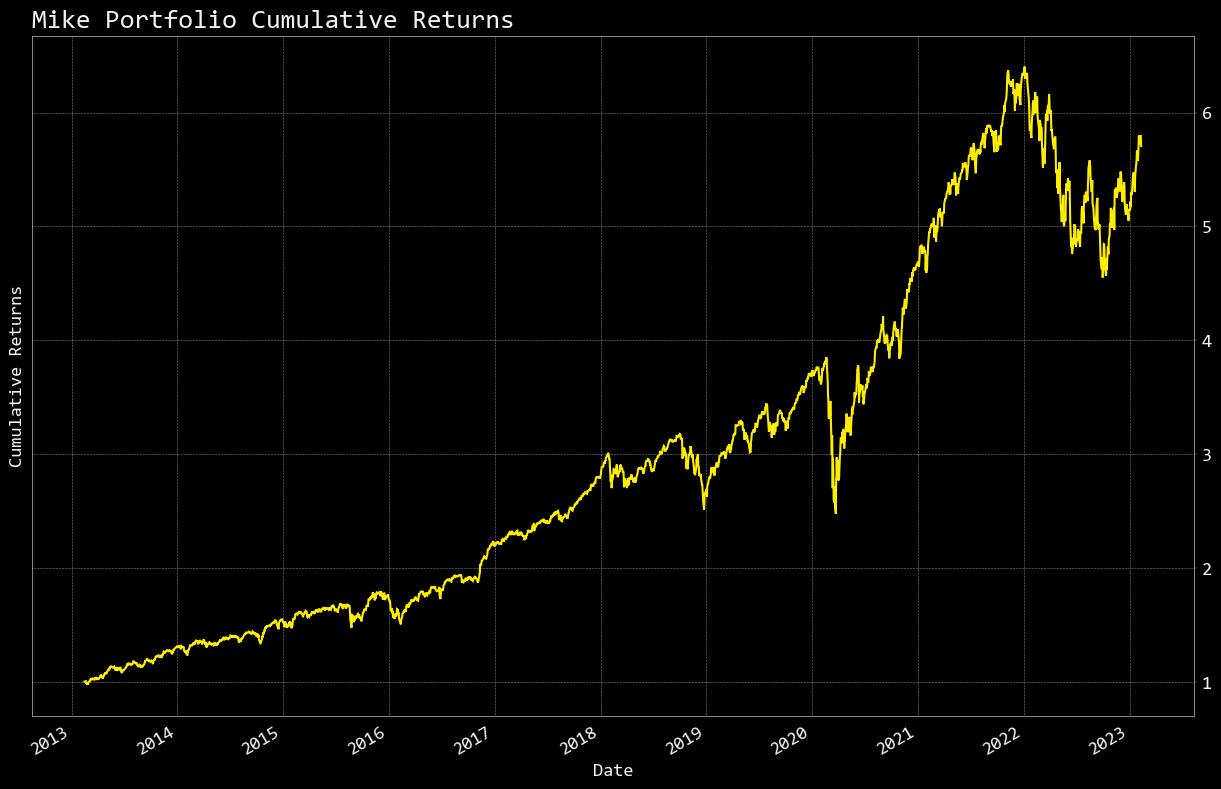

In [54]:
#Cumulative returns of the weighted portfolio
cum_returns = (1 + portfolio_weighted_returns).cumprod()
cum_returns.plot(
    title = "Mike Portfolio Cumulative Returns",
    figsize = (15, 10),
    ylabel = "Cumulative Returns"
)

<AxesSubplot: title={'left': 'Mike Portfolio 10k Basis'}, xlabel='Date'>

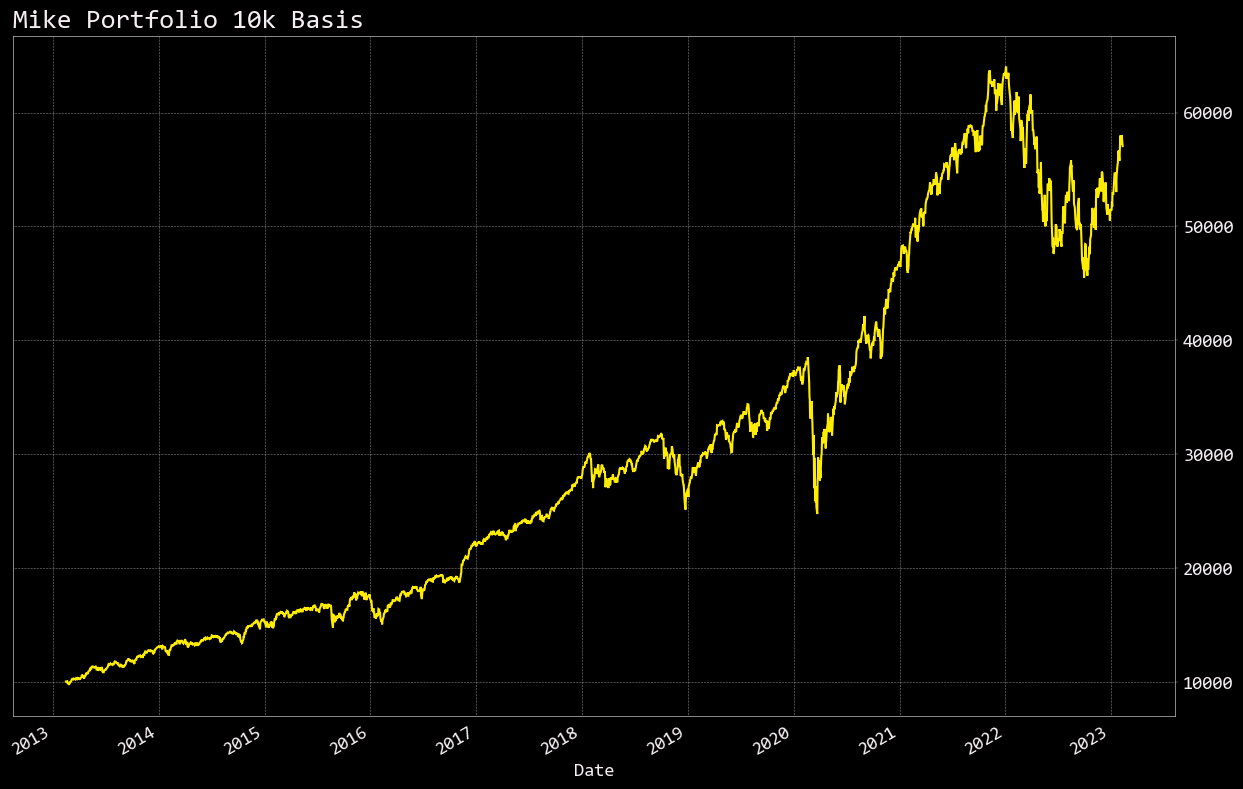

In [55]:
#cumulative returns for 10k investment
initial_investment = 10000
cum_returns = (1 + portfolio_weighted_returns).cumprod()
(initial_investment * cum_returns).plot(
    title = "Mike Portfolio 10k Basis",
    figsize = (15, 10)
)

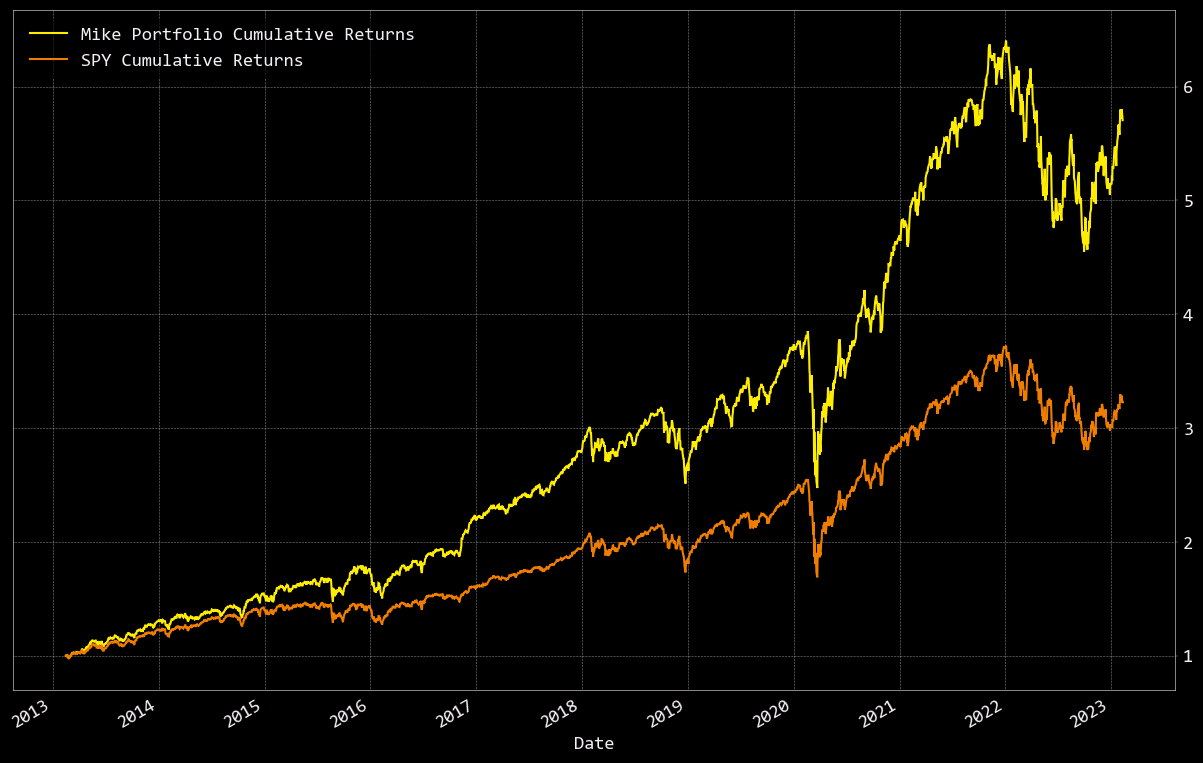

In [56]:
#Pull out the spy and look at its returns as a comparison
spy_returns = returns["SPY"]
spy_cum_returns = (1 + spy_returns).cumprod()

ax = cum_returns.plot(figsize = (15,10))
spy_cum_returns.plot(ax=ax)
ax.legend(["Mike Portfolio Cumulative Returns", "SPY Cumulative Returns"])

In [179]:
# Summary stats of portfolio vs SPY

portfolio_summary_stats = openbb.qa.summary(portfolio_weighted_returns)
spy_summary_stats = openbb.qa.summary(spy_returns)
summary_stats = pd.concat([portfolio_summary_stats, spy_summary_stats], axis="columns", join = "inner")
summary_stats

,0,SPY
count,251600.0000%,251600.0000%
mean,0.0768%,0.0527%
std,1.2254%,1.0989%
min,-12.7426%,-10.9424%
10%,-1.1740%,-1.0631%
25%,-0.3992%,-0.3642%
50%,0.0907%,0.0643%
75%,0.6281%,0.5608%
90%,1.2817%,1.1563%
max,12.1415%,9.0603%


In [180]:
openbb.qa.sharpe(portfolio_weighted_returns, rfr = 0, window = 252)

Date
2013-02-14 00:00:00-05:00               NaN
2013-02-15 00:00:00-05:00               NaN
2013-02-19 00:00:00-05:00               NaN
2013-02-20 00:00:00-05:00               NaN
2013-02-21 00:00:00-05:00               NaN
                                  ...      
2023-02-06 00:00:00-05:00   -53190275.0092%
2023-02-07 00:00:00-05:00   -53573071.3058%
2023-02-08 00:00:00-05:00   -53631009.2009%
2023-02-09 00:00:00-05:00   -53745524.2113%
2023-02-10 00:00:00-05:00   -54119416.4835%
Length: 2516, dtype: float64

In [65]:
#Get an overview of the stocks in the portfolio sorted by market cap
mike_portfolio_overview = openbb.stocks.ca.screener(similar = symbols, data_type = "overview").sort_values(by = ["Market Cap"], ascending = False)
mike_portfolio_overview

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2.421680e+12,26.03,153.20,-0.0042,60318993.0
20,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,USA,2.029990e+12,30.26,272.17,0.0031,36936877.0
22,NVDA,NVIDIA Corporation,Technology,Semiconductors,USA,5.935700e+11,97.71,229.71,0.0543,67249235.0
32,V,Visa Inc.,Financial,Credit Services,USA,4.766000e+11,32.06,229.39,0.0022,4767058.0
35,XOM,Exxon Mobil Corporation,Energy,Oil & Gas Integrated,USA,4.600300e+11,8.77,116.42,-0.0117,11967551.0
31,UNH,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,USA,4.525400e+11,23.26,492.83,-0.0051,2072239.0
14,JNJ,Johnson & Johnson,Healthcare,Drug Manufacturers - General,USA,4.216900e+11,24.05,162.04,-0.0044,6305378.0
15,JPM,JPMorgan Chase & Co.,Financial,Banks - Diversified,USA,4.181900e+11,11.85,143.20,0.0044,8926173.0
34,WMT,Walmart Inc.,Consumer Defensive,Discount Stores,USA,3.863500e+11,44.96,145.49,-0.0029,4610005.0
16,MA,Mastercard Incorporated,Financial,Credit Services,USA,3.571400e+11,36.20,369.96,-0.0023,1841064.0


In [66]:
#Look at the valuation data of all the stocks in the portfolio
mike_portfolio_valuation = openbb.stocks.ca.screener(similar = symbols, data_type = "valuation")
mike_portfolio_valuation

,Ticker,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,EPS next 5Y,Sales past 5Y,Price,Change,Volume
0,AAPL,2.421680e+12,26.03,23.26,3.20,6.25,42.91,47.16,29.31,0.089,0.1015,0.216,0.0813,0.115,153.20,-0.0042,60318993.0
1,AMGN,1.273800e+11,19.90,12.80,3.92,4.84,35.24,13.69,27.76,0.178,0.0589,0.020,0.0507,0.029,241.03,-0.0108,2007767.0
2,APD,6.231000e+10,27.77,22.51,3.16,4.84,4.49,19.78,NaN,0.106,0.1026,0.143,0.0879,0.092,281.49,-0.0182,1680819.0
3,AVGO,2.543100e+11,22.70,13.90,2.70,7.66,10.93,20.48,27.40,0.768,0.0664,0.458,0.0840,0.135,602.31,0.0020,1756097.0
4,BAC,2.868800e+11,11.19,9.63,3.33,3.95,1.20,0.34,NaN,0.907,0.0775,0.191,0.0336,-0.014,35.62,-0.0008,33596821.0
5,BUD,1.027200e+11,23.93,17.88,2.26,1.79,9.76,13.95,NaN,8.019,0.1380,0.274,0.1060,0.036,58.82,-0.0008,977749.0
6,COF,4.406000e+10,6.47,7.64,NaN,1.41,0.96,1.77,5.92,4.200,0.0437,0.312,-0.0660,0.024,115.35,-0.0172,2827933.0
7,COST,2.235800e+11,38.03,31.63,3.66,0.97,10.40,19.15,171.59,0.166,0.1004,0.167,0.1040,0.120,503.22,-0.0064,1254917.0
8,CVX,3.263700e+11,9.44,11.07,NaN,1.38,2.10,21.15,16.68,3.745,-0.0065,1.008,-0.0210,0.071,172.32,0.0077,7857713.0
9,DIS,2.008600e+11,59.22,19.67,2.87,2.38,2.04,23.71,2136.79,0.578,0.3249,-0.210,0.2064,0.085,107.66,0.0000,10697883.0


In [85]:
#Examine the performance metrics of the stocks in the portfolio
mike_portfolio_performance = openbb.stocks.ca.screener(similar = symbols, data_type = "performance").sort_values(by = ["Perf YTD"], ascending = False)
mike_portfolio_performance

,Ticker,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD,Volatility W,Volatility M,Recom,Avg Volume,Rel Volume,Price,Change,Volume
22,NVDA,0.0360,0.3593,0.4069,0.2070,-0.0408,0.5718,0.0543,0.0514,2.2,46530000.0,1.45,229.71,0.0543,67249235.0
6,COF,-0.0396,0.1215,-0.0077,0.0149,-0.2606,0.2409,0.0238,0.0369,2.6,3360000.0,0.84,115.35,-0.0172,2827933.0
9,DIS,-0.0356,0.0831,0.1331,-0.1336,-0.2797,0.2392,0.0337,0.0289,1.9,14850000.0,0.72,107.66,0.0000,10697883.0
0,AAPL,-0.0094,0.1368,0.0234,-0.1154,-0.0916,0.1791,0.0208,0.0254,2.0,76030000.0,0.79,153.20,-0.0042,60318993.0
26,QQQ,-0.0101,0.0918,0.0653,-0.0790,-0.1161,0.1520,0.0206,0.0209,NaN,50480000.0,1.26,306.75,0.0074,63853003.0
20,MSFT,0.0172,0.1377,0.1014,-0.0726,-0.0775,0.1349,0.0289,0.0259,1.8,30660000.0,1.20,272.17,0.0031,36936877.0
13,IWM,-0.0157,0.0292,0.0300,-0.0426,-0.0440,0.1041,0.0193,0.0191,NaN,22210000.0,0.98,192.51,-0.0005,21784931.0
32,V,-0.0083,0.0284,0.1190,0.0599,0.0209,0.1041,0.0148,0.0188,1.8,6400000.0,0.74,229.39,0.0022,4767058.0
7,COST,-0.0258,0.0370,-0.0238,-0.0779,-0.0127,0.1023,0.0165,0.0185,2.1,2160000.0,0.58,503.22,-0.0064,1254917.0
10,ETN,0.0516,0.0518,0.0704,0.1348,0.1481,0.1021,0.0292,0.0253,2.2,1680000.0,0.74,172.97,-0.0077,1244763.0


<AxesSubplot: title={'left': "Stocks in Mike's Portfolio Performance YTD"}, xlabel='Ticker'>

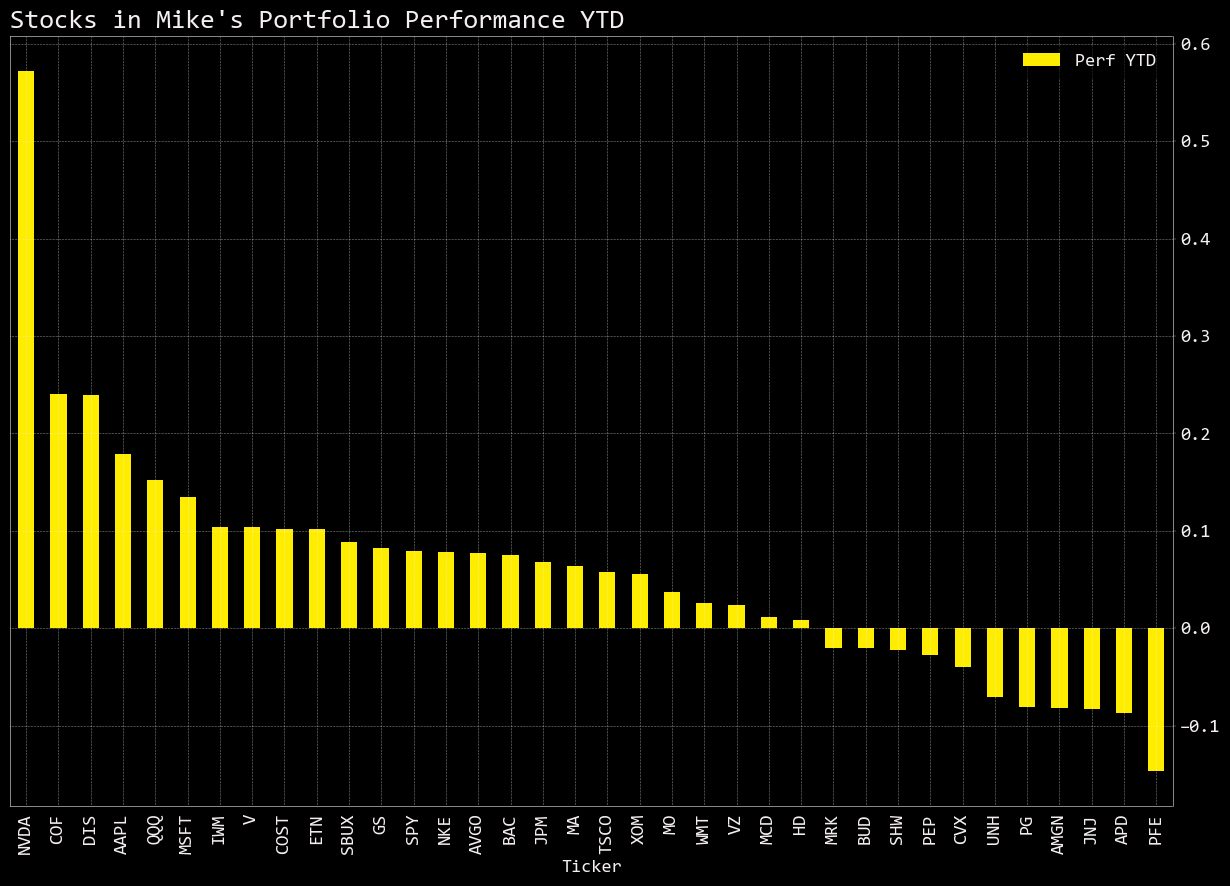

In [95]:
#Plotting the YTD Performance of the stock in the portfolio
mike_portfolio_performance.plot(
    kind="bar",
    x="Ticker", 
    y=["Perf YTD"],
    figsize=(15, 10),
    title="Stocks in Mike's Portfolio Performance YTD"

)

In [115]:
#Look at the Balance sheet of a few of the stocks in the portfolio
openbb.stocks.ca.balance(["NVDA", "COST", "MSFT", "SBUX"], timeframe = '2022')

Other available yearly timeframes are: 2018, 2019, 2020, 2021, 2022

,NVDA,COST,MSFT,SBUX
Item,,,,
Cash & Short Term Investments,21.21B,11.05B,104.76B,3.18B
Cash & Short Term Investments Growth,83.44%,-,-19.62%,-
Cash Only,1.99B,10.2B,13.93B,2.82B
Short-Term Investments,-,-,-,-
Cash & ST Investments / Total Assets,48.00%,17.22%,28.71%,11.38%
Total Accounts Receivable,4.65B,2.24B,44.26B,1.27B
Total Accounts Receivable Growth,91.44%,-,16.34%,-
"Accounts Receivables, Net",4.65B,-,44.26B,-
"Accounts Receivables, Gross",4.65B,-,44.89B,-


In [101]:
# Examine the divindends of Costco
cost_divs = openbb.stocks.fa.divs("COST")
cost_divs

,Dividends,Change
Date,,
2023-02-02 00:00:00-05:00,0.900,0.000
2022-10-27 00:00:00-04:00,0.900,0.000
2022-07-28 00:00:00-04:00,0.900,0.000
2022-04-28 00:00:00-04:00,0.900,0.110
2022-02-03 00:00:00-05:00,0.790,0.000
...,...,...
2005-05-04 00:00:00-04:00,0.115,0.015
2005-02-04 00:00:00-05:00,0.100,0.000
2004-11-03 00:00:00-05:00,0.100,0.000


<AxesSubplot: title={'left': 'Costco Dividends & Dividend Changes by Year (Log Scale)'}, xlabel='Date'>

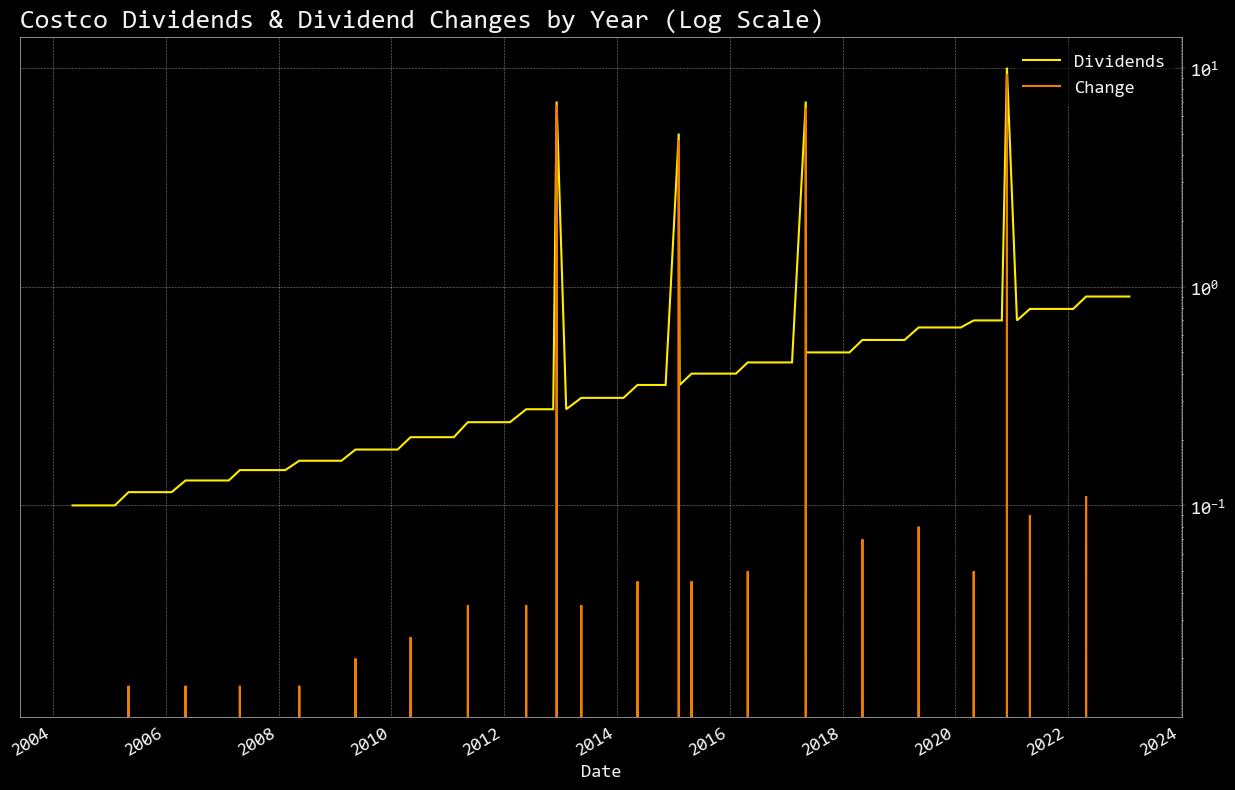

In [106]:
#Plot the dividends and changes in dividends of Costco overtime
cost_divs.plot(
    title="Costco Dividends & Dividend Changes by Year (Log Scale)",
    figsize = (15,10),
    logy=True


)

In [107]:
# News
cost_news = openbb.news(term = "Costco dividend increase")
cost_news

Fetching data. Please be patient

,title,link,published
23,"Earnings Previews: Cenovus Energy, Datadog, Pa...",https://news.google.com/rss/articles/CBMiZWh0d...,2023-02-14 16:47:05+00:00
18,Why the Highest Yielding Warren Buffett Stocks...,https://news.google.com/rss/articles/CBMieGh0d...,2023-02-14 11:49:05+00:00
22,Consumers suing to block grocery merger | Nort...,https://news.google.com/rss/articles/CBMieWh0d...,2023-02-14 08:00:00+00:00
13,Got $1000? 3 Simple Stocks to Buy Right Now - ...,https://news.google.com/rss/articles/CBMiTGh0d...,2023-02-10 10:40:00+00:00
2,Barclays Initiates Coverage of Costco Wholesal...,https://news.google.com/rss/articles/CBMidWh0d...,2023-02-09 04:07:00+00:00
...,...,...,...
19,Costco Just Raised Its Dividend. It's One More...,https://news.google.com/rss/articles/CBMiTmh0d...,2022-04-13 07:00:00+00:00
68,Costco Wholesale Corporation Announces an Incr...,https://news.google.com/rss/articles/CBMiXWh0d...,2022-04-13 07:00:00+00:00
84,Costco Stock: Is Another Stock Split Likely? W...,https://news.google.com/rss/articles/CBMiUGh0d...,2022-04-06 07:00:00+00:00
26,Is Costco Ready to Issue a Special Dividend? -...,https://news.google.com/rss/articles/CBMiVmh0d...,2022-03-15 07:00:00+00:00


In [117]:
# Creating the Portfolio Object
port = rp.Portfolio(returns=returns)

In [127]:
# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

In [132]:
# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, MV is standard deviation
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

w

,weights
SPY,0.0000%
COST,20.8710%
AVGO,13.2706%
APD,0.0000%
AMGN,0.0000%
CVX,0.0000%
AAPL,0.6922%
DIS,0.0000%
BAC,0.0000%
GS,0.0000%


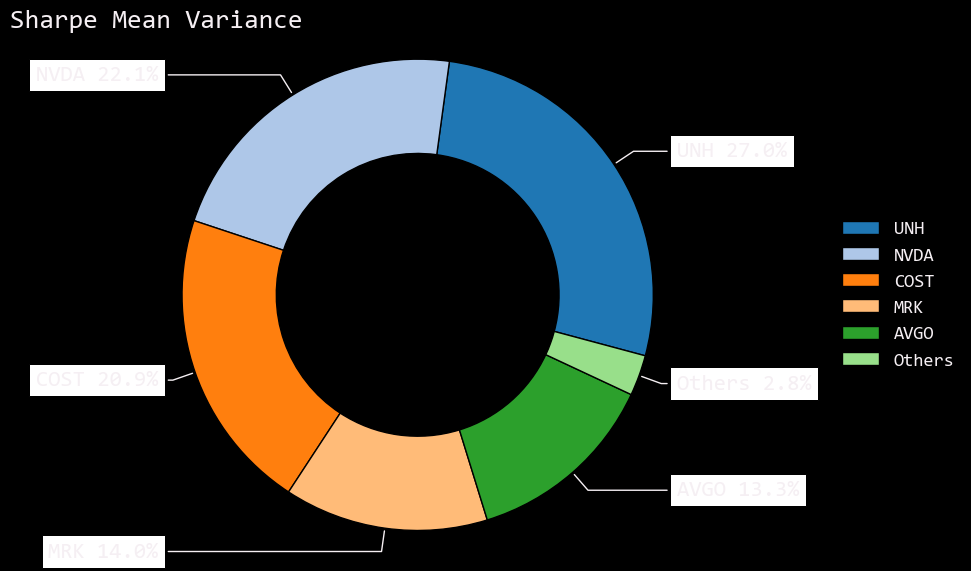

In [130]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [134]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())
#frontier

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
0,0.0000%,5.1221%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,5.8644%,8.0607%,6.4966%,3.0324%,0.0000%,2.3385%,0.0000%,21.0124%,0.0000%,13.1311%
1,0.0000%,11.7061%,1.5965%,0.0000%,0.0000%,0.0000%,1.6029%,0.0000%,0.0000%,0.0000%,...,2.9364%,4.3813%,7.4942%,0.0000%,0.0000%,3.7441%,4.7971%,11.4876%,0.0000%,9.1544%
2,0.0000%,13.9286%,3.0010%,0.0000%,0.0000%,0.0000%,1.6002%,0.0000%,0.0000%,0.0000%,...,1.2251%,2.6931%,7.3185%,0.0000%,0.0000%,3.8455%,7.9791%,7.2880%,0.0000%,7.6333%
3,0.0000%,15.6989%,4.1184%,0.0000%,0.0000%,0.0000%,1.5962%,0.0000%,0.0000%,0.0000%,...,0.0000%,1.3392%,7.1748%,0.0000%,0.0000%,3.9227%,10.5032%,3.9254%,0.0000%,6.4173%
4,0.0000%,17.2527%,5.0884%,0.0000%,0.0000%,0.0000%,1.5781%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0795%,7.0201%,0.0000%,0.0000%,3.9631%,12.6368%,0.8375%,0.0000%,5.3172%


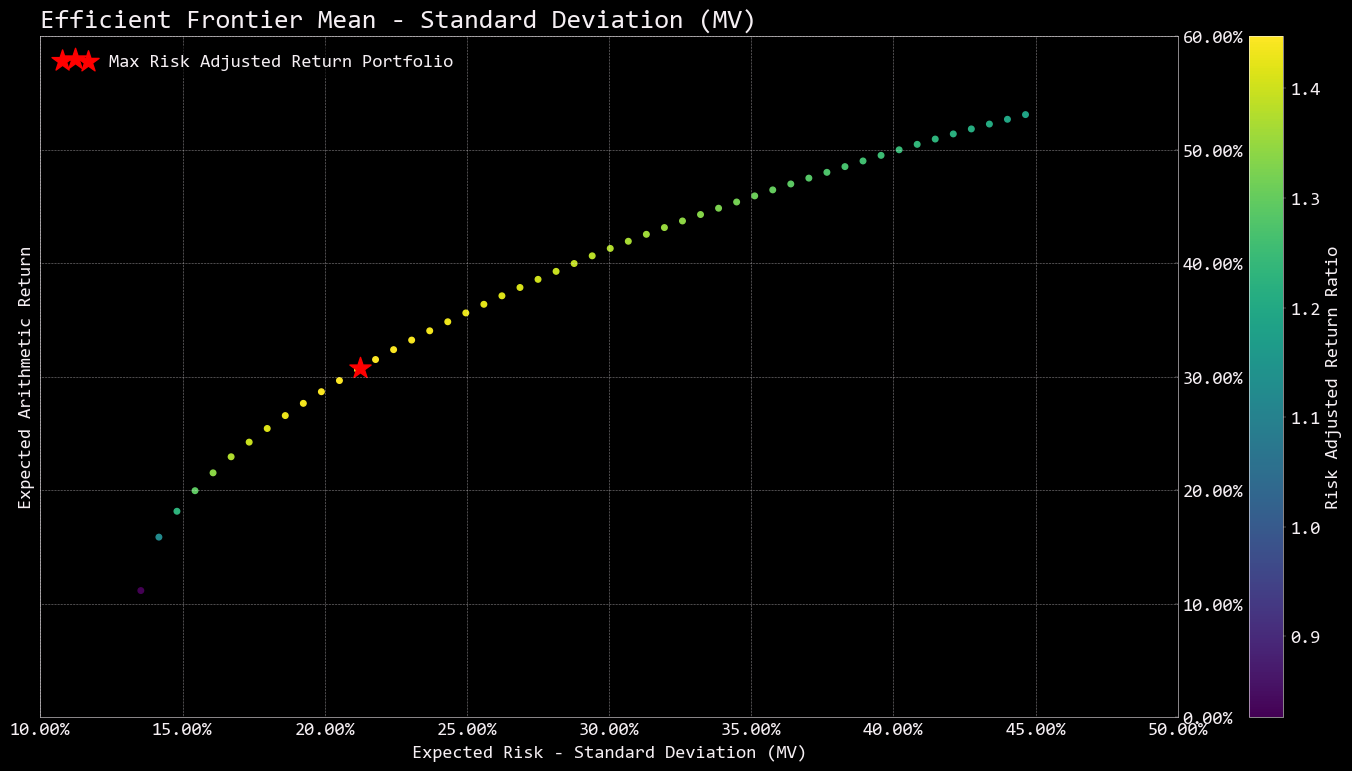

In [139]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=8, width=15, ax=None)

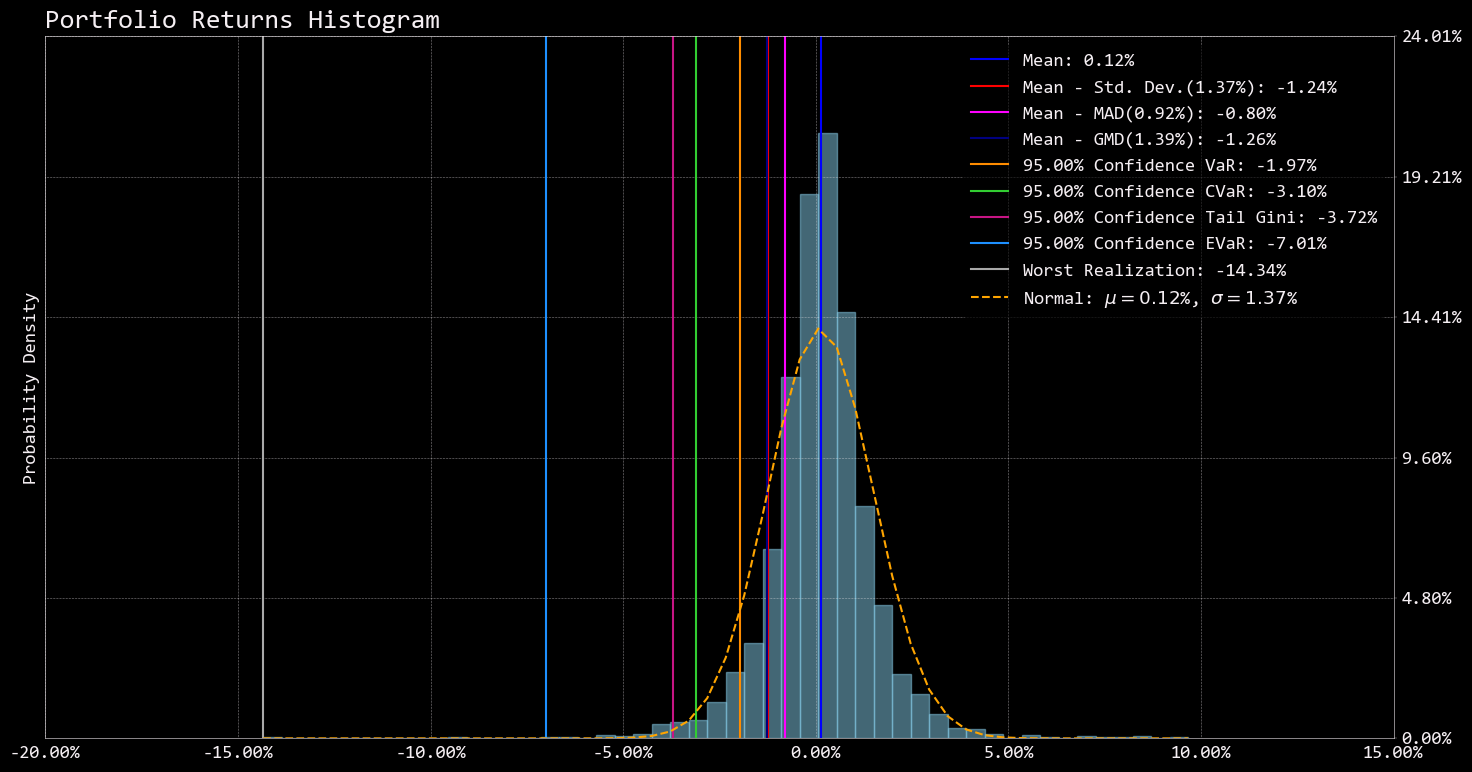

In [142]:
ax = rp.plot_hist(returns=returns, w=w1, alpha=0.05, bins=50, height=8,
                  width=15, ax=None)

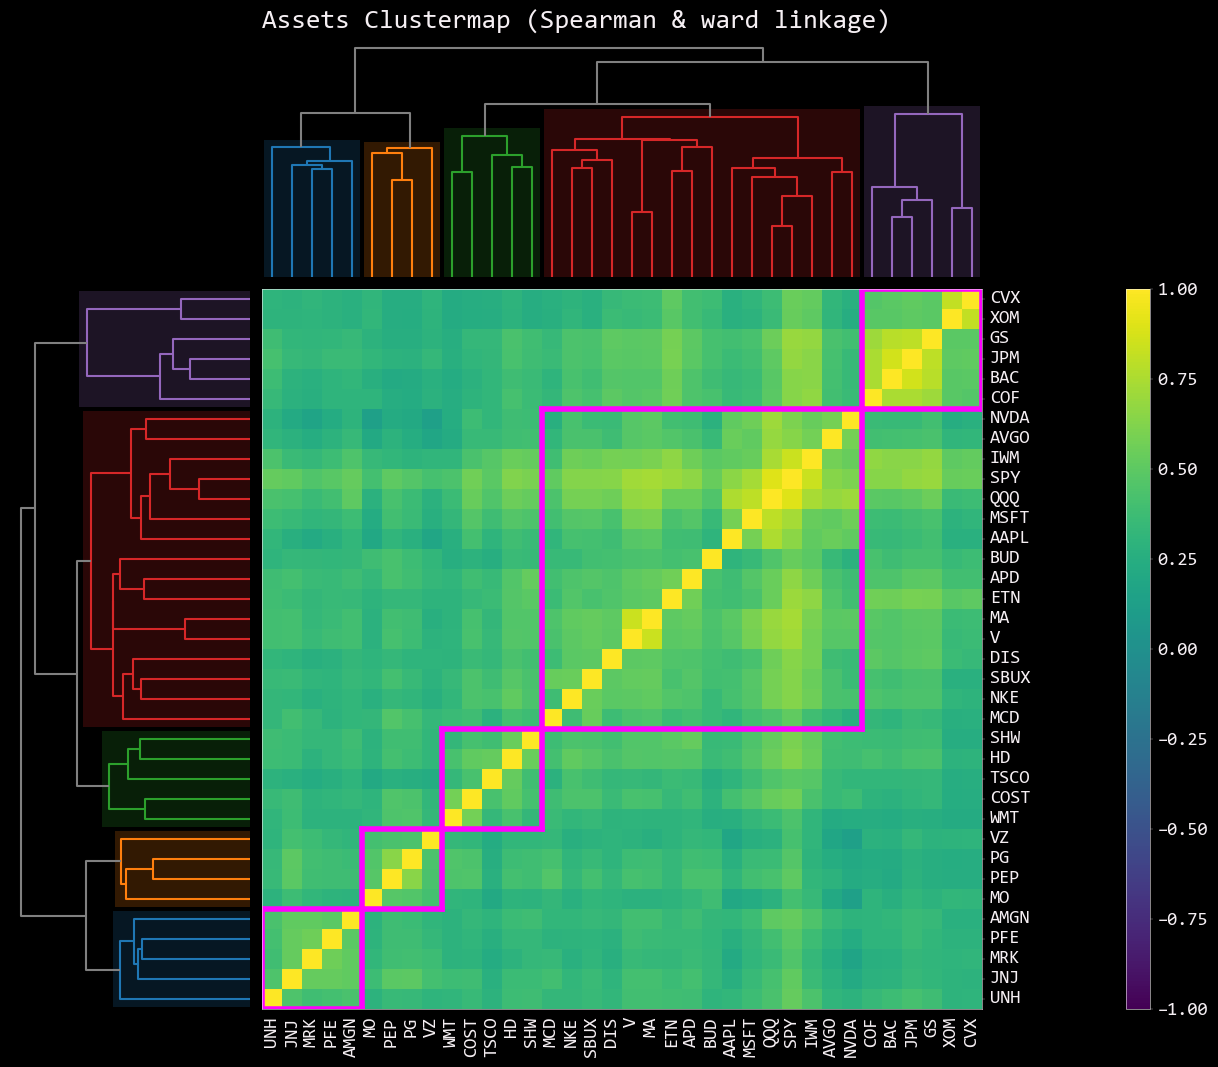

In [144]:
ax = rp.plot_clusters(returns=returns, codependence='spearman',
                      linkage='ward', k=None, max_k=10,
                      leaf_order=True, dendrogram=True, ax=None)